# MODELLING AND EVALUATION NOTEBOOK

## Objectives
The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## INPUTS

project5_cherryleaves/jupyter_notebooks/inputs/train
project5_cherryleaves/jupyter_notebooks/inputs/test
project5_cherryleaves/jupyter_notebooks/inputs/validation
image shape embeddings

## OUTPUTS

- Images distribution plot in train, validation, and test set
- Image augmentation
- Class indices to change prediction inference in labels
- Machine learning model creation and training
- Save model
- Learning curve plot for model performance
- Model evaluation on pickle file
- Prediction on the random image file

## Additional Comments | Insights | Conclusions

## Set Working directory

In [5]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: /workspace/project5_cherryleaves/jupyter_notebooks


In [6]:
work_dir = os.getcwd()
work_dir

'/workspace/project5_cherryleaves/jupyter_notebooks'

## Set input directories

In [10]:
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

print("Train directory:", train_path)
print("Validation directory:", val_path)
print("Test directory:", test_path)

Train directory: /workspace/project5_cherryleaves/jupyter_notebooks/inputs/train
Validation directory: /workspace/project5_cherryleaves/jupyter_notebooks/inputs/validation
Test directory: /workspace/project5_cherryleaves/jupyter_notebooks/inputs/test


## Number of images in train, test and validation data

## Importing necessary libraries and modules

In [19]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the directory containing the data
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs'

# Define the labels
labels = ['healthy', 'powdery_mildew']


## Creating an empty DataFrame to store label frequencies

In [20]:

df_freq = pd.DataFrame([])


## Counting frequencies of labels in different sets

In [21]:

for folder in ['train', 'validation', 'test']:
    for label in labels:
        # Count the number of images in the current label folder
        num_images = len(os.listdir(os.path.join(my_data_dir, folder, label)))
        
        # Append the label frequency to the DataFrame
        df_freq = df_freq.append(pd.Series({
            'Set': folder,
            'Label': label,
            'Frequency': num_images
        }), ignore_index=True)
        
        # Print the frequency for each label in each set
        print(f"* {folder} - {label}: {num_images} images")


* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


## Plotting the label distribution

<AxesSubplot:xlabel='Set', ylabel='Frequency'>

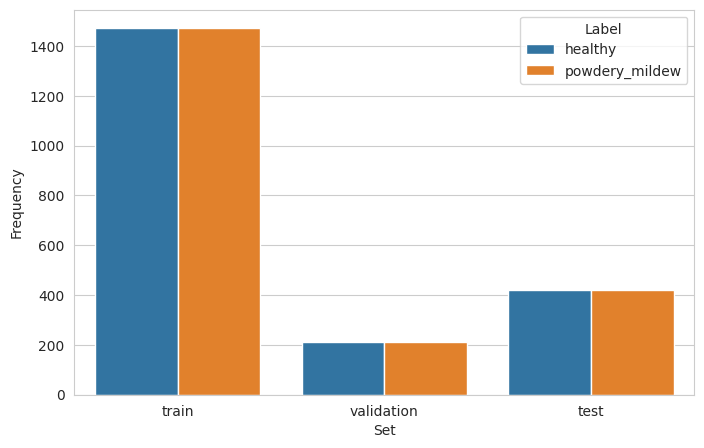

In [22]:

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')


## Saving the plot and defining the directory where the plot should be saved

In [23]:

save_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/modelling'

# Create the 'modelling' folder if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the plot
plt.savefig(f'{save_dir}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

<Figure size 640x480 with 0 Axes>

# Image Data Augmentation

## Importing necessary libraries and modules

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import joblib
import os

# Target size for resizing the images
image_shape = (256, 256, 3)  

# Directory paths
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

## Define batch size and image augmentation parameters

In [9]:

batch_size = 20

augmented_image_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, 
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

## Define image generators for validation and test sets without augmentation

In [10]:

validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.


## Generate augmented training set

In [11]:

train_set = augmented_image_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 2944 images belonging to 2 classes.


## Print class indices

In [12]:

print("Train Set Class Indices:", train_set.class_indices)
print("Validation Set Class Indices:", validation_set.class_indices)
print("Test Set Class Indices:", test_set.class_indices)


Train Set Class Indices: {'healthy': 0, 'powdery_mildew': 1}
Validation Set Class Indices: {'healthy': 0, 'powdery_mildew': 1}
Test Set Class Indices: {'healthy': 0, 'powdery_mildew': 1}


## Visualize sample images

Image Shape: (20, 256, 256, 3)


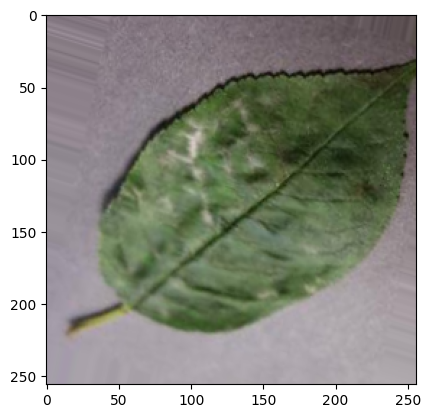

Image Shape: (20, 256, 256, 3)


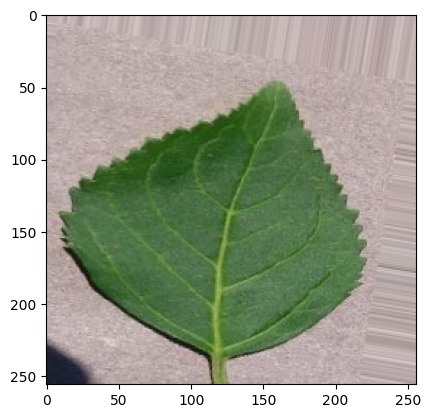

Image Shape: (20, 256, 256, 3)


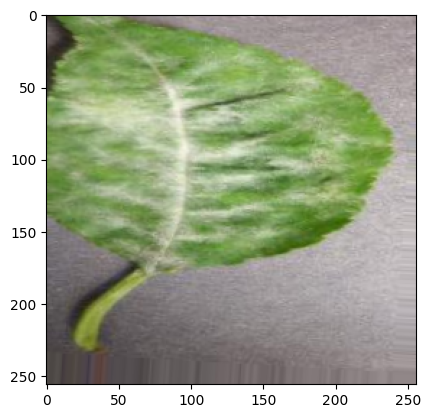

Image Shape: (20, 256, 256, 3)


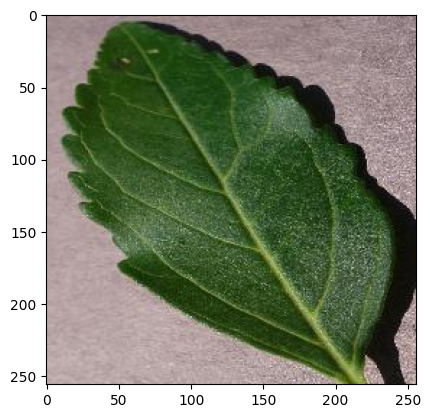

Image Shape: (20, 256, 256, 3)


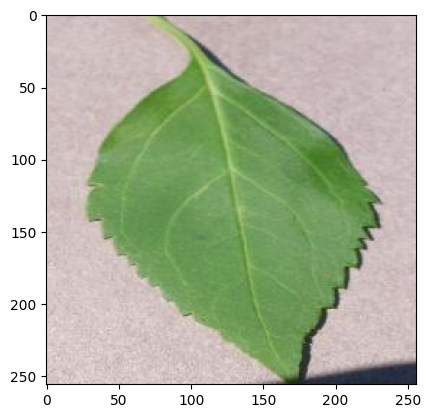

Image Shape: (20, 256, 256, 3)


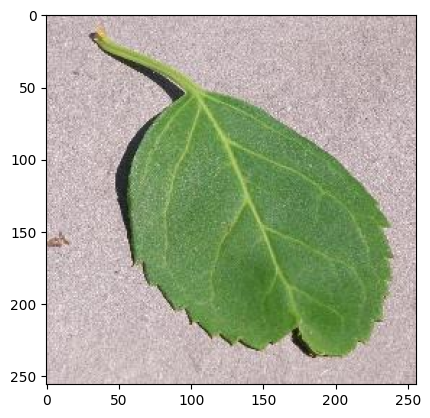

Image Shape: (20, 256, 256, 3)


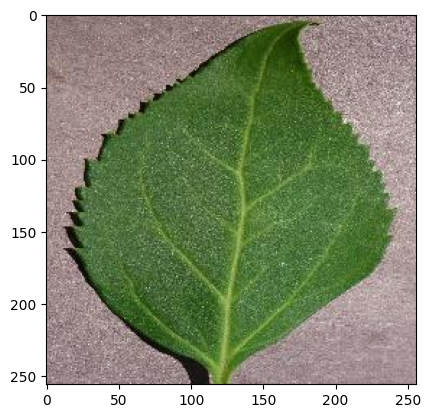

Image Shape: (20, 256, 256, 3)


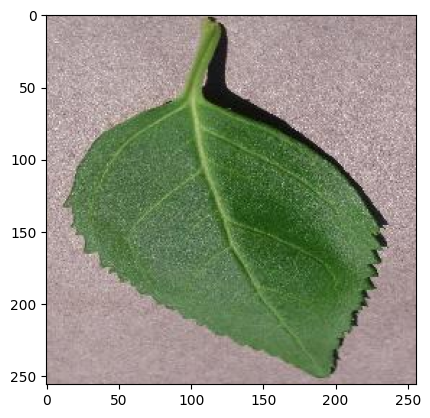

Image Shape: (20, 256, 256, 3)


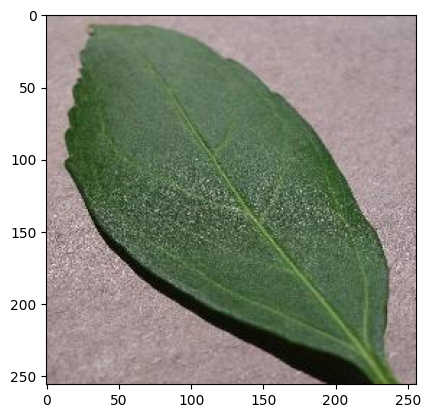

In [13]:
def visualize_sample_images(data_generator, num_samples=3):
    class_labels = ['healthy', 'powdery mildew']  
    for label_idx, label in enumerate(class_labels):
        print(f"Sample images for class '{label}':")
        for _ in range(num_samples):
            img, _ = data_generator.next()
            print("Image Shape:", img.shape)
            plt.imshow(img[0])
            plt.title(label)
            plt.show()

# Visualize sample images for training, validation, and test sets
visualize_sample_images(train_set)
visualize_sample_images(validation_set)
visualize_sample_images(test_set)

## Save class indices

In [14]:

save_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/image_augmentation'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

joblib.dump(value=train_set.class_indices, filename=os.path.join(save_dir, 'class_indices.pkl'))

['/workspace/project5_cherryleaves/jupyter_notebooks/outputs/image_augmentation/class_indices.pkl']

# MODEL CREATION

## Importing necessary libraries and modules

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


## Define the image shape and batch size

In [63]:
image_shape = (256, 256, 3)  
batch_size = 20

##  Define function to create the TensorFlow model

In [64]:
def create_tf_model():
    print("Creating TensorFlow model...")
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # Two classes: powdery mildew and healthy
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Model created successfully.")
    return model



## Print model summary

In [65]:
print("Model Summary:")
create_tf_model().summary()

Model Summary:
Creating TensorFlow model...
Model created successfully.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        36928     
                                                

## Define early stopping callback

In [66]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## Load data generators

In [67]:
print("\nLoading data generators...")
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, 
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',  # Change to categorical for multiple classes
    shuffle=True
)

validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',  # Change to categorical for multiple classes
    shuffle=False
)
print("Data generators loaded successfully.")



Loading data generators...
Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Data generators loaded successfully.


## Fit the model

In [68]:
print("\nTraining the model...")
model = create_tf_model()
history = model.fit(
    train_set,
    epochs=25,
    steps_per_epoch=len(train_set.classes) // batch_size,
    validation_data=validation_set,
    callbacks=[early_stop],
    verbose=1
)
print("Model training completed.")



Training the model...
Creating TensorFlow model...
Model created successfully.
Epoch 1/25
147/147 [==============================] - 131s 888ms/step - loss: 0.2583 - accuracy: 0.8741 - val_loss: 0.1038 - val_accuracy: 0.9857
Epoch 2/25
147/147 [==============================] - 162s 1s/step - loss: 0.0945 - accuracy: 0.9651 - val_loss: 0.1277 - val_accuracy: 0.9810
Epoch 3/25
147/147 [==============================] - 184s 1s/step - loss: 0.0414 - accuracy: 0.9897 - val_loss: 0.1244 - val_accuracy: 0.9619
Epoch 4/25
147/147 [==============================] - 275s 2s/step - loss: 0.0404 - accuracy: 0.9863 - val_loss: 0.1783 - val_accuracy: 0.9833
Model training completed.


## Save the model

In [70]:
print("\nSaving the model...")
model.save('outputs/v1/cherry_leaves_model.keras')

print("Model saved successfully.")




Saving the model...
Model saved successfully.


## Plot model training losses


Plotting model training losses...


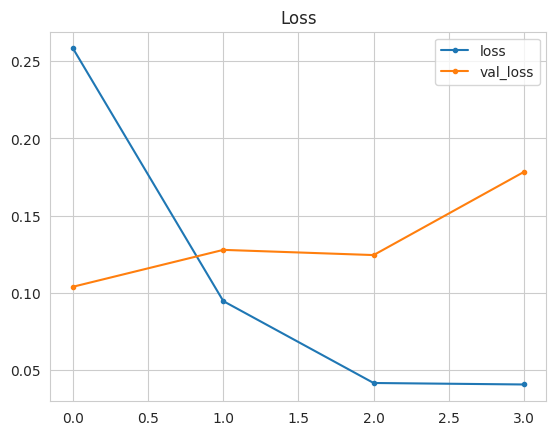

In [73]:
print("\nPlotting model training losses...")
losses = pd.DataFrame(history.history)
sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig('outputs/v1/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()


## Plot model training accuracy


Plotting model training accuracy...


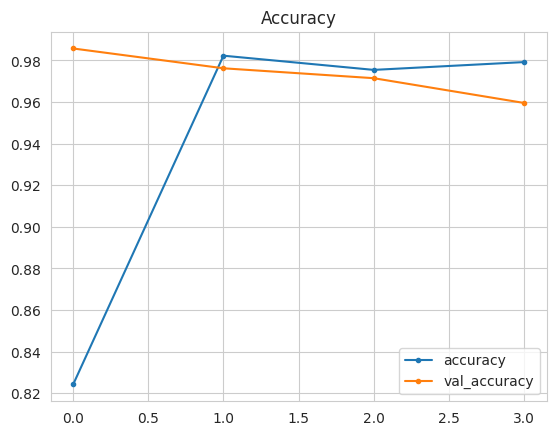

In [72]:
print("\nPlotting model training accuracy...")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig('outputs/v1/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()



## Evaluate the model on the test set

In [90]:
print("\nSaving the evaluation results...")
joblib.dump(value=evaluation, filename='outputs/v1/evaluation.pkl')
print("Evaluation results saved successfully.")


Saving the evaluation results...
Evaluation results saved successfully.


## Save the evaluation results

In [91]:
print("\nSaving the evaluation results...")
joblib.dump(value=evaluation, filename='outputs/v1/evaluation.pkl')
print("Evaluation results saved successfully.")



Saving the evaluation results...
Evaluation results saved successfully.


## Load a saved model for prediction

In [92]:
print("\nLoading a saved model for prediction...")
model = tf.keras.models.load_model('outputs/v1/cherry_leaves_model.h5')
print("Model loaded successfully.")




Loading a saved model for prediction...
Model loaded successfully.


## Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


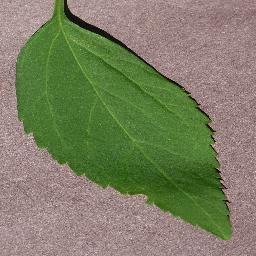

In [94]:
pointer = 66 
label = labels[0]  # select Uninfected or Parasitized

pil_image = image.load_img(
    os.path.join(test_path, label, os.listdir(os.path.join(test_path, label))[pointer]),
    target_size=image_shape,
    color_mode='rgb'
)
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

## Convert image to array and prepare for prediction

In [95]:
print("\nConverting image to array and preparing for prediction...")
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0) / 255
print("Image converted and prepared for prediction successfully.")



Converting image to array and preparing for prediction...
Image converted and prepared for prediction successfully.


## Predict class probabilities

In [96]:
print("\nPredicting class probabilities...")
pred_proba = model.predict(my_image)[0]  
predicted_class_index = np.argmax(pred_proba)
predicted_class = labels[predicted_class_index]
pred_probability = pred_proba[predicted_class_index]

print(f"Predicted Probability: {pred_probability}")
print(f"Predicted Class: {predicted_class}")


Predicting class probabilities...
1/1 [==============================] - 0s 73ms/step
Predicted Probability: 0.9999991655349731
Predicted Class: healthy


# PUSH FILE TO REPO

In [37]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../README.md
	modified:   DataCollection.ipynb
	modified:   DataModelling.ipynb
	modified:   DataVisualization.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.vscode/settings.json
	outputs/augmented_images/
	outputs/image_augmentation/
	outputs/model/
	outputs/modelling/
	outputs/v1/

no changes added to commit (use "git add" and/or "git commit -a")


In [86]:
!git add .

In [88]:
!git commit -m "revising the code for ML learning"

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.vscode/settings.json

no changes added to commit (use "git add" and/or "git commit -a")


In [89]:
!git push

Enumerating objects: 26, done.
Counting objects: 100% (26/26), done.
Delta compression using up to 16 threads
Compressing objects: 100% (17/17), done.
Writing objects: 100% (18/18), 136.97 MiB | 10.48 MiB/s, done.
Total 18 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), completed with 4 local objects.
remote: warning: See https://gh.io/lfs for more information.
remote: warning: File jupyter_notebooks/outputs/v1/cherry_leaves_model.keras is 85.07 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: File jupyter_notebooks/outputs/v1/cherry_leaves_model/variables/variables.data-00000-of-00001 is 85.03 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: File jupyter_notebooks/outputs/v1/cherry_leaves_model.h5 is 85.07 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storag